In [1]:
import pandas as pd
import numpy as np

In [43]:
pd.set_option("display.max_rows", None)

In [44]:
df = pd.read_csv('London_hotel_reviews.csv')


In [45]:
df.head()


,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
0,Apex London Wall Hotel,5.0,Ottima qualità prezzo,Siamo stati a Londra per un week end ed abbiam...,"Casale Monferrato, Italy",10/20/2012
1,Corinthia Hotel London,5.0,"By far, my best hotel in the world",I had a pleasure of staying in this hotel for ...,"Savannah, Georgia",3/23/2016
2,The Savoy,5.0,First visit to the American Bar at the Savoy,A very lovely first visit to this iconic hotel...,London,7/30/2013
3,Rhodes Hotel,4.0,Nice stay,3 of us stayed at the Rhodes Hotel for 4 night...,"Maui, Hawaii",06-02-2012
4,The Savoy,5.0,Perfection,Form the moment we arrived until we left we ex...,"London, United Kingdom",11/24/2017


In [46]:
df.tail()

,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
27326,Corinthia Hotel London,5.0,The Best 5 star Luxury Hotel in London,I come to London often but since I stayed in t...,"Munich, Germany",12-12-2015
27327,A To Z Hotel,3.0,Mala Estadia,En cuarto que nos tocó no había toallas y habí...,"Mexico City, Mexico",9/29/2015
27328,The Rembrandt,4.0,Excellent hotel in outstanding location,This is a quality quiet hotel located in an ex...,"Adelaide, Australia",07-11-2017
27329,The Dorchester,4.0,"Trevliga rum, men högljud AC","Väldigt vackra rum, tyvärr med en mycket höglj...","Gothenburg, Sweden",05-06-2014
27330,The Savoy,5.0,Great as always,I have been staying in London hotels for 10 ye...,"Ballymena, United Kingdom",4/24/2017


In [47]:
df.shape

(27331, 6)

In [48]:
df.isnull().sum()

Property Name                  1
Review Rating                  1
Review Title                   1
Review Text                    1
Location Of The Reviewer    3954
Date Of Review                 2
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27331 entries, 0 to 27330
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Property Name             27330 non-null  object 
 1   Review Rating             27330 non-null  float64
 2   Review Title              27330 non-null  object 
 3   Review Text               27330 non-null  object 
 4   Location Of The Reviewer  23377 non-null  object 
 5   Date Of Review            27329 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.3+ MB


In [50]:
#creating a copy of original dataset:

new_df=df.copy()
new_df.head()

,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
0,Apex London Wall Hotel,5.0,Ottima qualità prezzo,Siamo stati a Londra per un week end ed abbiam...,"Casale Monferrato, Italy",10/20/2012
1,Corinthia Hotel London,5.0,"By far, my best hotel in the world",I had a pleasure of staying in this hotel for ...,"Savannah, Georgia",3/23/2016
2,The Savoy,5.0,First visit to the American Bar at the Savoy,A very lovely first visit to this iconic hotel...,London,7/30/2013
3,Rhodes Hotel,4.0,Nice stay,3 of us stayed at the Rhodes Hotel for 4 night...,"Maui, Hawaii",06-02-2012
4,The Savoy,5.0,Perfection,Form the moment we arrived until we left we ex...,"London, United Kingdom",11/24/2017


In [51]:
# Checking how many attributes are dtype: object

obj = new_df.select_dtypes(include = "object").columns
print (obj)

Index(['Property Name', 'Review Title', 'Review Text',
       'Location Of The Reviewer', 'Date Of Review'],
      dtype='object')


In [52]:
# Checking how many atrributes are dtype:float64
flo = new_df.select_dtypes(include = "float64").columns
print(flo)

Index(['Review Rating'], dtype='object')


In [53]:
new_df["Review Rating"].describe()

count    27330.000000
mean         4.490999
std          0.891704
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Review Rating, dtype: float64

In [54]:
import statistics as st
import numpy as np

mode_value = st.mode(new_df["Review Rating"])
mode_value

5.0

In [55]:
new_df["Review Rating"].fillna(value=mode_value, inplace=True)

In [56]:
new_df.isnull().sum()

Property Name                  1
Review Rating                  0
Review Title                   1
Review Text                    1
Location Of The Reviewer    3954
Date Of Review                 2
dtype: int64

In [57]:
new_df["Review Rating"].describe()

count    27331.000000
mean         4.491018
std          0.891693
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Review Rating, dtype: float64

In [58]:
gy = new_df.groupby("Review Rating")

In [59]:
gy.count()['Property Name']

Review Rating
1.0      617
2.0      691
3.0     1675
4.0     6020
5.0    18327
Name: Property Name, dtype: int64

In [60]:
df = pd.DataFrame({'Review Rating':['1', '2', '3','4','5'], 'freq':[617,691,1675,6020,18327]})

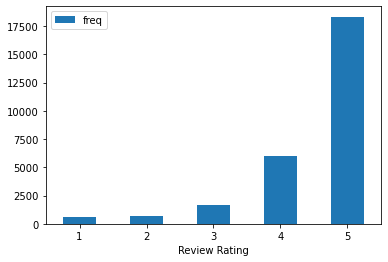

In [61]:
box = df.plot.bar(x='Review Rating', y='freq', rot=0)


In [62]:
plt.show()

NameError: name 'plt' is not defined

In [63]:
gy.first()

,Property Name,Review Title,Review Text,Location Of The Reviewer,Date Of Review
Review Rating,,,,,
1.0,Corinthia Hotel London,Staff stole from me!!,Well I am no strange to London's 5star hotels ...,"Newport Beach, California",03-01-2013
2.0,The Savoy,what a disappointment,was so looking forward to staying here had hig...,"Derby, United Kingdom",06-05-2016
3.0,Mondrian London at Sea Containers,Nice rooms but not quite wow,Nice visit but didn't feel special. Upgraded t...,Woking,5/31/2016
4.0,Rhodes Hotel,Nice stay,3 of us stayed at the Rhodes Hotel for 4 night...,"Maui, Hawaii",06-02-2012
5.0,Apex London Wall Hotel,Ottima qualità prezzo,Siamo stati a Londra per un week end ed abbiam...,"Casale Monferrato, Italy",10/20/2012


In [64]:
gy.get_group(5).head()

,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
0,Apex London Wall Hotel,5.0,Ottima qualità prezzo,Siamo stati a Londra per un week end ed abbiam...,"Casale Monferrato, Italy",10/20/2012
1,Corinthia Hotel London,5.0,"By far, my best hotel in the world",I had a pleasure of staying in this hotel for ...,"Savannah, Georgia",3/23/2016
2,The Savoy,5.0,First visit to the American Bar at the Savoy,A very lovely first visit to this iconic hotel...,London,7/30/2013
4,The Savoy,5.0,Perfection,Form the moment we arrived until we left we ex...,"London, United Kingdom",11/24/2017
6,Apex London Wall Hotel,5.0,Great customer service and comfy bed,"The hotel staff were very helpful, I booked th...","Lostwithiel, United Kingdom",10/22/2017


In [28]:
#df1 = pd.DataFrame(columns= ["Review Title","Review Rating","Postive Score","Neutral Score","Negative Score"])


In [29]:
#df2 = pd.DataFrame(columns= ["Review Title","Review Rating","Postive Score","Neutral Score","Negative Score"])

In [65]:
from googletrans import Translator

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [66]:

review = new_df["Review Text"]

translator = Translator()

stop_words = set(stopwords.words('english'))

In [32]:
x=25871

while x<27331: 
    if x not in [44,237, 505,658,922,1243,17429,19251]:
        rat = new_df["Review Rating"]
        rat1 = rat[x]

        t_rat = new_df["Review Title"]
        t_rat1 = t_rat[x]

        text = review[x].split()

        #text
        ct = " ".join(ch for ch in text if ch.isalnum())
        #print(review)

        translated_text = translator.translate(ct)
        #print(translated_text.text)

        trans_text = translated_text.text
        #trans_text

        token_text = word_tokenize(trans_text.lower())

        #print(token_text)
        #print(len(token_text))

        fs = [ch for ch in token_text if not ch.lower() in stop_words]
        #print(fs)
        #print(len(fs)) #Filtered Sentence
        fs1 = set(fs)
        fsl = list(fs1)
        #len(fsl)

        sid = SentimentIntensityAnalyzer()
        pos_list=[]
        neu_list=[]
        neg_list=[]

        for word in fsl:
            if (sid.polarity_scores(word)['compound']) >= 0.5:
                pos_list.append(word)
            elif (sid.polarity_scores(word)['compound']) <= -0.5:
                neg_list.append(word)
            else:
                neu_list.append(word)                

        #print('Positive :',pos_list)        
        #print('Neutral :',neu_list)    
        #print('Negative :',neg_list) 

        len_pos = len(pos_list)
        len_neu = len(neu_list)
        len_neg = len(neg_list)

        li = [t_rat1, rat1, len_pos, len_neu, len_neg]


        df2.loc[x]=li

NameError: name 'df2' is not defined

In [33]:
#df1.tail()

In [34]:
#df2.to_excel("Output1.xlsx", index=False)

In [35]:
#import socket
#socket.getaddrinfo('localhost', 8080)

In [36]:
#df2.tail()

In [2]:
data1 = pd.read_excel("Output_6555.xlsx")

In [5]:
data1

,Review Title,Review Rating,Postive Score,Neutral Score,Negative Score
0,Ottima qualità prezzo,5,3,65,0
1,"By far, my best hotel in the world",5,3,87,1
2,First visit to the American Bar at the Savoy,5,3,17,0
3,Nice stay,4,3,28,0
4,Perfection,5,3,25,0
...,...,...,...,...,...
6546,Grand as ever,4,0,39,0
6547,Bonne découverte,4,3,47,0
6548,Super suite!,5,4,23,0
6549,First class hotel with first class service,5,2,17,0


In [3]:
data2 = pd.read_excel("Output1_6555to15000.xlsx")

In [7]:
data2

,Review Title,Review Rating,Postive Score,Neutral Score,Negative Score
0,Impeccable hotel and service,5,2,87,0
1,Fantastic Afternoon Tea,5,2,31,0
2,great personalised service,5,2,18,0
3,The best night and morning of my life!,5,4,73,0
4,Brilliant New Southbank Hotel,5,4,36,0
...,...,...,...,...,...
8438,Would stay again if I could afford it!,5,2,55,0
8439,Lovely weekend break,5,1,44,0
8440,"Penny, Sydney Australia",4,0,27,0
8441,London Weekend Trip,4,1,11,0


In [4]:
data3 = pd.read_excel("Output1_15000 to 27377.xlsx")
data3

,Review Title,Review Rating,Postive Score,Neutral Score,Negative Score
0,One of the Best For the Price,5,1,30,0
1,Traditional and serious 5* hotel,5,6,136,1
2,Congratulations!!,5,2,30,0
3,Fantastic location for the budget traveler,4,2,20,0
4,perfect,5,2,41,0
...,...,...,...,...,...
12323,The Best 5 star Luxury Hotel in London,5,1,18,0
12324,Mala Estadia,3,0,28,0
12325,Excellent hotel in outstanding location,4,1,23,0
12326,"Trevliga rum, men högljud AC",4,1,17,0


In [5]:
data_f = pd.concat([data1, data2, data3])

In [6]:
data_f['Review Rating'].value_counts()

5    18325
4     6015
3     1675
2      691
1      616
Name: Review Rating, dtype: int64

D:\Lucifer\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Review Rating', ylabel='count'>

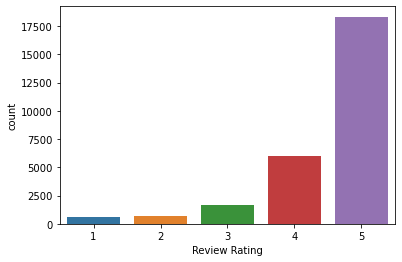

In [8]:
import seaborn as sns
sns_pp = sns.countplot(data_f['Review Rating'])
sns_pp


In [9]:
data_f.shape

(27322, 5)

In [ ]:
data_upsampled.shape

In [ ]:
data_upsampled["Review Rating"].value_counts()

In [ ]:
data_upsampled.head()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import svm

In [42]:
X = data_f[["Postive Score", "Negative Score", "Neutral Score"]]

In [43]:
y = data_f["Review Rating"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.2)

In [45]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21857, 3) (5465, 3) (21857,) (5465,)


In [47]:
model = DecisionTreeClassifier()

In [48]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred_test = model.predict(X_test)

In [50]:
acc = accuracy_score(y_pred_test, y_test)
acc

0.6554437328453797

In [51]:
y_pred_train = model.predict(X_train)

In [52]:
acc1 = accuracy_score(y_pred_train, y_train)
acc1

0.7104360159216727

In [53]:
cr_test = classification_report(y_pred_test, y_test)
print(cr_test)

              precision    recall  f1-score   support

           1       0.17      0.25      0.20        85
           2       0.04      0.11      0.06        53
           3       0.06      0.22      0.10        96
           4       0.08      0.28      0.12       340
           5       0.94      0.70      0.80      4891

    accuracy                           0.66      5465
   macro avg       0.26      0.31      0.26      5465
weighted avg       0.85      0.66      0.73      5465



In [54]:
import pickle

In [55]:
filename="trained_model.sav"
pickle.dump(model,open(filename,'wb'))

In [57]:
#Loading the saved model
model_load = pickle.load(open('trained_model.sav','rb'))

In [80]:
a = input()

I am excellent student *&*


In [81]:
a

'I am excellent student *&*'

In [82]:
text = a.split()

In [83]:
ct = " ".join(ch for ch in text if ch.isalnum())

In [84]:
translated_text = translator.translate(ct)

In [85]:
trans_text = translated_text.text
token_text = word_tokenize(trans_text.lower())

In [86]:
fs = [ch for ch in token_text if not ch.lower() in stop_words]
#print(fs)
#print(len(fs)) #Filtered Sentence
fs1 = set(fs)
fsl = list(fs1)

In [101]:
sid = SentimentIntensityAnalyzer()
pos_list=[]
neu_list=[]
neg_list=[]

for word in fsl:
    if (sid.polarity_scores(word)['compound']) >= 0.5:
        pos_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.5:
        neg_list.append(word)
    else:
        neu_list.append(word)                

print('Positive :',pos_list)        
print('Neutral :',neu_list)    
print('Negative :',neg_list) 

len_pos = len(pos_list)
len_neu = len(neu_list)
len_neg = len(neg_list)

li = [[len_pos, len_neu, len_neg]]
li

Positive : ['excellent']
Neutral : ['student']
Negative : []


[[1, 1, 0]]

In [102]:
lm = pd.DataFrame(li)

In [103]:
lm

,0,1,2
0,1,1,0


In [104]:
model.predict(lm)

D:\Lucifer\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

In [106]:
model_load.predict(li)

D:\Lucifer\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)